In [1]:
from import_all import *

In [1]:
from import_all import *
import pickle
df_final = pd.read_pickle("../data_products/final_ML_inputs_KAS.pkl")
with open("../data_products/final_merger_infos2.pickle", "rb") as handle:
    halos = pickle.load(handle)

# Description on Simulation

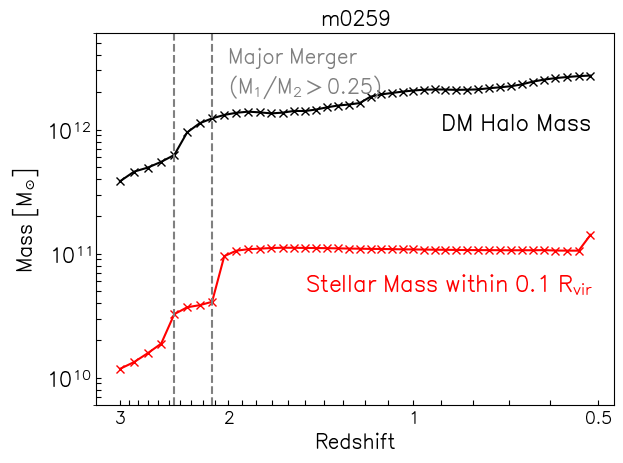

In [67]:
hid = 'm0259'
halo = halos[hid]

fig,ax = plt.subplots()
ax.loglog(halo.mmps.redshift.values, halo.mmps.Mvir.values, color='k', marker='x', label='Halo')
ax.loglog(halo.mmps.redshift.values, halo.mmps.SM.values, color='r', marker='x', label='Stellar')

for _,mmp in halo.mmps.iterrows():
    merger = halo.merger[(halo.merger.Snap_idx==mmp.Snap_idx) & (halo.merger.id!=mmp.id)]
    if len(merger)>0:
        ratio = merger.SM.values.max() / mmp.SM
        if ratio > 1/4:
            ax.axvline(mmp.redshift, color='gray', linestyle='--')
ax.text(0.9, 1e12, "DM Halo Mass", color='k', fontsize=20)
ax.text(1.5, 5e10, "Stellar Mass within 0.1 $R_{vir}$", color='r', fontsize=20)
ax.text(2., 2e12, "Major Merger\n($M_1/M_2>0.25$)", color='gray', fontsize=18)
ax.set_xticks(np.linspace(3,0.5,26))
ax.set_xticklabels(['3','','','','','','','','','','2','','','','','','','','','','1','','','','','0.5'], fontsize=15)
ax.set_yticks([7e9,8e9,9e9,1e10,2e10,3e10,4e10,5e10,6e10,7e10,8e10,9e10,1e11,2e11,3e11,4e11,5e11,6e11,7e11,8e11,9e11,1e12,2e12,3e12,4e12,5e12])
ax.set_yticklabels(['','','',r'$10^{10}$','','','','','','','','',r'$10^{11}$','','','','','','','','',r'$10^{12}$','','','',''], fontsize=18)
ax.set_ylim([6e9,6e12])
ax.invert_xaxis()
#ax.grid(True, linestyle='--', alpha=0.4)
ax.label_outer()
ax.tick_params(axis='both',direction='in')
ax.set_title(f'{hid}', fontsize=18)
ax.set_xlabel("Redshift", fontsize=18)
ax.set_ylabel("Mass [$M_{\odot}$]", fontsize=18)
plt.tight_layout()
plt.savefig("./poster_figs/mass_evol.pdf")
plt.show()

In [6]:
with h5py.File("/data2/Fiducial_MrAGN/m0259/snap_m0259_sf_x_2x_026.hdf5") as f:
    dm = f["PartType1"]["Coordinates"][:,:] * 1e-3
    star = f["PartType4"]["Coordinates"][:,:] * 1e-3

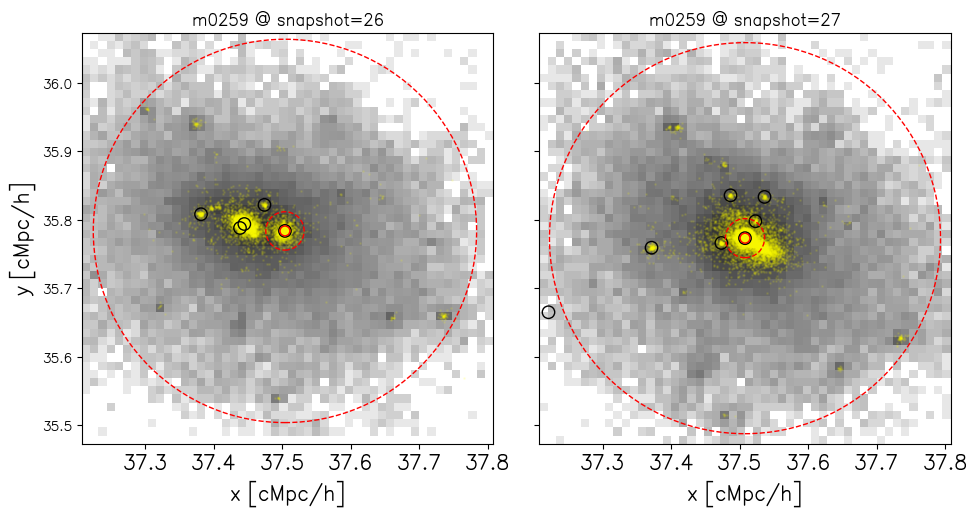

In [54]:
box = 0.3
xbins = np.linspace(37.50766-box, 37.50766+box, 51)
ybins = np.linspace(35.77333-box, 35.77333+box, 51)

plt.figure(figsize=(10,5))
hid = 'm0259'
refsnap = 26

plt.subplot(121)
halo = halos[hid]
snapNum = refsnap
snap = halo.tree[(halo.tree.Snap_idx==snapNum) & (halo.tree.SM>1e8)]

with h5py.File(f"/data2/Fiducial_MrAGN/{hid}/snap_{hid}_sf_x_2x_{snapNum:03d}.hdf5") as f:
    gas  = f["PartType0"]["Coordinates"][:,:] * 1e-3
    dm   = f["PartType1"]["Coordinates"][:,:] * 1e-3
    star = f["PartType4"]["Coordinates"][:,:] * 1e-3

hx,hy,hz = halo.mmps[halo.mmps.Snap_idx==snapNum][['x','y','z']].iloc[0]
#box = 0.2
gasidx  = (gas[:,0]>hx-box)&(gas[:,0]<hx+box) & (gas[:,1]>hy-box)&(gas[:,1]<hy+box) & (gas[:,2]>hz-box)&(gas[:,2]<hz+box)
dmidx   = (dm[:,0]>hx-box)&(dm[:,0]<hx+box) & (dm[:,1]>hy-box)&(dm[:,1]<hy+box) & (dm[:,2]>hz-box)&(dm[:,2]<hz+box)
staridx = (star[:,0]>hx-box)&(star[:,0]<hx+box) & (star[:,1]>hy-box)&(star[:,1]<hy+box) & (star[:,2]>hz-box)&(star[:,2]<hz+box)

plt.hist2d(dm[dmidx,0], dm[dmidx,1],bins=[xbins,ybins], norm=mpl.colors.LogNorm(), cmap=plt.get_cmap("gray_r"))
plt.scatter(star[staridx,0], star[staridx,1], color='yellow', s=1, alpha=0.1)
plt.scatter(snap.x.values, snap.y.values, s=80, edgecolor='k', facecolor='none', label='some halos')
plt.scatter(halo.mmps[halo.mmps.Snap_idx==snapNum].x, halo.mmps[halo.mmps.Snap_idx==snapNum].y, edgecolor='r', s=50, facecolor='none', label='mmp')
#plt.scatter([snap.x.iat[list(snap.id.values).index(6329.0)]], [snap.y.iat[list(snap.id.values).index(6329.0)]], edgecolor='g', s=50, facecolor='none')

circ1 = plt.Circle((halo.mmps[halo.mmps.Snap_idx==snapNum].x.iat[0], halo.mmps[halo.mmps.Snap_idx==snapNum].y.iat[0]), radius=halo.mmps[halo.mmps.Snap_idx==snapNum].Rvir.iat[0]*1e-3*0.1,
                fill=False, color='r', linestyle='--')
circ2 = plt.Circle((halo.mmps[halo.mmps.Snap_idx==snapNum].x.iat[0], halo.mmps[halo.mmps.Snap_idx==snapNum].y.iat[0]), radius=halo.mmps[halo.mmps.Snap_idx==snapNum].Rvir.iat[0]*1e-3,
                fill=False, color='r', linestyle='--')
plt.gca().add_patch(circ1)
plt.gca().add_patch(circ2)

plt.gca().set_aspect("equal","box")
plt.title(f'{hid} @ snapshot={snapNum}')
plt.xlabel('x [cMpc/h]',fontsize=18)
plt.xticks(fontsize=18)
plt.ylabel('y [cMpc/h]',fontsize=18)
plt.xticks(fontsize=18)
#plt.legend(loc='best')

plt.subplot(122)
halo = halos[hid]
snapNum = refsnap+1
snap = halo.tree[(halo.tree.Snap_idx==snapNum) & (halo.tree.SM>1e8)]

with h5py.File(f"/data2/Fiducial_MrAGN/{hid}/snap_{hid}_sf_x_2x_{snapNum:03d}.hdf5") as f:
    gas  = f["PartType0"]["Coordinates"][:,:] * 1e-3
    dm   = f["PartType1"]["Coordinates"][:,:] * 1e-3
    star = f["PartType4"]["Coordinates"][:,:] * 1e-3

hx,hy,hz = halo.mmps[halo.mmps.Snap_idx==snapNum][['x','y','z']].iloc[0]

gasidx  = (gas[:,0]>hx-box)&(gas[:,0]<hx+box) & (gas[:,1]>hy-box)&(gas[:,1]<hy+box) & (gas[:,2]>hz-box)&(gas[:,2]<hz+box)
dmidx   = (dm[:,0]>hx-box)&(dm[:,0]<hx+box) & (dm[:,1]>hy-box)&(dm[:,1]<hy+box) & (dm[:,2]>hz-box)&(dm[:,2]<hz+box)
staridx = (star[:,0]>hx-box)&(star[:,0]<hx+box) & (star[:,1]>hy-box)&(star[:,1]<hy+box) & (star[:,2]>hz-box)&(star[:,2]<hz+box)

plt.hist2d(dm[dmidx,0], dm[dmidx,1],bins=[xbins,ybins], norm=mpl.colors.LogNorm(), cmap=plt.get_cmap("gray_r"))
plt.scatter(star[staridx,0], star[staridx,1], color='yellow', s=1, alpha=0.1)
plt.scatter(snap.x.values, snap.y.values, s=80, edgecolor='k', facecolor='none', label='some halos')
plt.scatter(halo.mmps[halo.mmps.Snap_idx==snapNum].x, halo.mmps[halo.mmps.Snap_idx==snapNum].y, edgecolor='r', s=50, facecolor='none', label='mmp')
#plt.scatter([snap.x.iat[list(snap.id.values).index(6329.0)]], [snap.y.iat[list(snap.id.values).index(6329.0)]], edgecolor='g', s=50, facecolor='none')

circ1 = plt.Circle((halo.mmps[halo.mmps.Snap_idx==snapNum].x.iat[0], halo.mmps[halo.mmps.Snap_idx==snapNum].y.iat[0]), radius=halo.mmps[halo.mmps.Snap_idx==snapNum].Rvir.iat[0]*1e-3*0.1,
                fill=False, color='r', linestyle='--')
circ2 = plt.Circle((halo.mmps[halo.mmps.Snap_idx==snapNum].x.iat[0], halo.mmps[halo.mmps.Snap_idx==snapNum].y.iat[0]), radius=halo.mmps[halo.mmps.Snap_idx==snapNum].Rvir.iat[0]*1e-3,
                fill=False, color='r', linestyle='--')
plt.gca().add_patch(circ1)
plt.gca().add_patch(circ2)

plt.gca().set_aspect("equal","box")
plt.title(f'{hid} @ snapshot={snapNum}')
plt.xlabel('x [cMpc/h]',fontsize=18)
plt.xticks(fontsize=18)
plt.ylabel('y [cMpc/h]',fontsize=18)
plt.xticks(fontsize=18)
plt.gca().label_outer()
#plt.legend(loc='best')
plt.tight_layout()

plt.savefig("./poster_figs/m0259_snap_26_27.pdf")
plt.show()

# Create dataset for ML

## Morphological parameters and Intrinsic Merger
2 --> Merging snapshots
1 --> time window

In [2]:
with open("final_merger_infos2.pickle","rb") as handle:
    halos = pickle.load(handle)

In [2]:
def get_merger_def(haloTree,snapNum):
    this_snap_merger = haloTree.merger.loc[haloTree.merger.Snap_idx==snapNum,:]

    if len(this_snap_merger)>1:
        mmp = haloTree.mmps.loc[haloTree.mmps.Snap_idx==snapNum,:]
        mmp_id = mmp.id.iat[0]
        merging_galaxy = this_snap_merger[this_snap_merger.id != mmp_id]
        merging_galaxy = merging_galaxy[merging_galaxy.SM==merging_galaxy.SM.values.max()] # merging한 은하들 중 제일 무거운 애
        
        prog_merging_galaxy = haloTree.tree.loc[(haloTree.tree.Snap_idx==snapNum-1),:]
        prog_merging_galaxy = prog_merging_galaxy.loc[prog_merging_galaxy.desc_id==merging_galaxy.id.iat[0],:]
        if len(prog_merging_galaxy) > 1:
            prog_merging_galaxy = prog_merging_galaxy.loc[prog_merging_galaxy.SM==prog_merging_galaxy.SM.values.max(),:]
        #print(len(prog_merging_galaxy))
        
        prog_mmp = haloTree.mmps.loc[haloTree.mmps.Snap_idx==snapNum-1,:]
        
        merger_ratio = prog_merging_galaxy.SM.iat[0] / prog_mmp.SM.iat[0]
        if merger_ratio > 1/4:  def_4 = 2
        else: def_4 = 0
        if merger_ratio > 1/10: def_10 = 2
        else: def_10 = 0
        if merger_ratio > 1/20: def_20 = 2
        else: def_20 = 0
        if merger_ratio > 1/50: def_50 = 2
        else: def_50 = 0
        if merger_ratio > 1/100: def_100 = 2
        else: def_100 = 0
        if merger_ratio > 1/1000: def_1000 = 2
        else: def_1000 = 0
        return merger_ratio, def_4, def_10, def_20, def_50, def_100, def_1000
    else:
        return 0.,0,0,0,0,0,0

In [3]:
from tqdm import tqdm

In [34]:
cols = ['hid','snapNum','redshift','lookback','theta','phi','x','y','z','Rvir','Mvir','SM','G','M20','ASYM','CONC','merger_ratio','def_4','def_10','def_20','def_50','def_100','def_1000']
data = []
GMs_save = dict()
for halo in os.listdir("/data2/agn_trigger/Fiducial_MrAGN/"):
    if halo not in ['m0204']:
        for filename in os.listdir(f"/data2/agn_trigger/Fiducial_MrAGN/{halo}/NIRCam_F277W/512/"):
            try:
                hdul = fits.open(f"/data2/agn_trigger/Fiducial_MrAGN/{halo}/NIRCam_F277W/512/{filename}")
                header = hdul["SOURCE_MORPH"].header
                G,M20,ASYM,CONC = list(map(lambda x:header[x], ['GINI','M20','ASYM','CONC']))
                snapNum = int(filename.split('.')[1])
                redshift = 1/snap_at[snapNum]-1
                theta   = int(filename.split('.')[2].split('_')[-1])
                phi     = int(filename.split('.')[3].split('_')[-1])
                hdul.close()

                merger_ratio,def_4,def_10,def_20,def_50,def_100,def_1000 = get_merger_def(halos[halo], snapNum)
                
                hx,hy,hz,hrvir,hmvir,SM = halos[halo].mmps.loc[halos[halo].mmps.Snap_idx==snapNum][['x','y','z','Rvir','Mvir','SM']].iloc[0].values
                data.append([halo, snapNum, redshift, Planck13.age(z=0).value - Planck13.age(z=redshift).value, 
                                theta, phi, hx, hy, hz, hrvir, hmvir, SM, G, M20, ASYM, CONC, merger_ratio, def_4, def_10, def_20, def_50, def_100, def_1000]) #int(0), int(0), int(0), int(0), int(0), int(0)])
            except:
                print(halo,filename)
                pass
df = pd.DataFrame(columns=cols, data=data)
df.sort_values(by=['hid', 'snapNum'], ascending=[True, True], inplace=True)

m0094 output.019.theta_108.phi_111.image.mock.fits
m0094 output.019.theta_90.phi_93.image.mock.fits
m0189 output.025.theta_14.phi_212.image.mock.fits
m0189 output.025.theta_14.phi_299.image.mock.fits
m0190 output.020.theta_115.phi_41.image.mock.fits
m0190 output.020.theta_150.phi_203.image.mock.fits
m0190 output.020.theta_98.phi_302.image.mock.fits
m0215 output.039.theta_141.phi_321.image.mock.fits
m0215 output.047.theta_25.phi_117.image.mock.fits
m0227 output.019.theta_13.phi_165.image.mock.fits
m0227 output.019.theta_167.phi_60.image.mock.fits
m0227 output.046.theta_138.phi_64.image.mock.fits
m0259 output.023.theta_107.phi_26.image.mock.fits
m0300 output.043.theta_38.phi_66.image.mock.fits
m0664 output.047.theta_86.phi_245.image.mock.fits
m0858 output.020.theta_121.phi_213.image.mock.fits
m0858 output.020.theta_15.phi_330.image.mock.fits
m0908 output.022.theta_48.phi_72.image.mock.fits
m0908 output.022.theta_70.phi_104.image.mock.fits
m0908 output.022.theta_93.phi_30.image.mock.fits


In [35]:
## adding classification for merging snapshots within time window
time_window = 0.3 # Gyr
df_final = df.copy()
for _,_df in df.loc[df.def_4==2,:].iterrows():
    center_lookback = _df.lookback
    idx = (np.abs((df.lookback.values - center_lookback)) < 0.3) & (np.abs(df.lookback.values - center_lookback)>0)
    df_final.loc[(idx & (df_final.hid==_df.hid)),'def_4'] = 1

for _,_df in df.loc[df.def_10==2,:].iterrows():
    center_lookback = _df.lookback
    idx = (np.abs((df.lookback.values - center_lookback)) < 0.3) & (np.abs(df.lookback.values - center_lookback)>0)
    df_final.loc[(idx & (df_final.hid==_df.hid)),'def_10'] = 1

for _,_df in df.loc[df.def_20==2,:].iterrows():
    center_lookback = _df.lookback
    idx = (np.abs((df.lookback.values - center_lookback)) < 0.3) & (np.abs(df.lookback.values - center_lookback)>0)
    df_final.loc[(idx & (df_final.hid==_df.hid)),'def_20'] = 1

for _,_df in df.loc[df.def_50==2,:].iterrows():
    center_lookback = _df.lookback
    idx = (np.abs((df.lookback.values - center_lookback)) < 0.3) & (np.abs(df.lookback.values - center_lookback)>0)
    df_final.loc[(idx & (df_final.hid==_df.hid)),'def_50'] = 1

for _,_df in df.loc[df.def_100==2,:].iterrows():
    center_lookback = _df.lookback
    idx = (np.abs((df.lookback.values - center_lookback)) < 0.3) & (np.abs(df.lookback.values - center_lookback)>0)
    df_final.loc[(idx & (df_final.hid==_df.hid)),'def_100'] = 1

for _,_df in df.loc[df.def_1000==2,:].iterrows():
    center_lookback = _df.lookback
    idx = (np.abs((df.lookback.values - center_lookback)) < 0.3) & (np.abs(df.lookback.values - center_lookback)>0)
    df_final.loc[(idx & (df_final.hid==_df.hid)),'def_1000'] = 1



In [36]:
np.unique(df_final.def_4.values)

array([0, 1, 2])

In [37]:
print("Merger ratio (1/4) --> %.1f percent"%((df_final.def_4>0).sum() / len(df_final)*100))
print("Merger ratio (1/10) --> %.1f percent"%((df_final.def_10>0).sum() / len(df_final)*100))
print("Merger ratio (1/20) --> %.1f percent"%((df_final.def_20>0).sum() / len(df_final)*100))
print("Merger ratio (1/50) --> %.1f percent"%((df_final.def_50>0).sum() / len(df_final)*100))
print("Merger ratio (1/100) --> %.1f percent"%((df_final.def_100>0).sum() / len(df_final)*100))
print("Merger ratio (1/1000) --> %.1f percent"%((df_final.def_1000>0).sum() / len(df_final)*100))

Merger ratio (1/4) --> 9.6 percent
Merger ratio (1/10) --> 12.1 percent
Merger ratio (1/20) --> 15.4 percent
Merger ratio (1/50) --> 19.8 percent
Merger ratio (1/100) --> 23.0 percent
Merger ratio (1/1000) --> 36.2 percent


In [38]:
def get_GM(halo,snapNum, hx, hy,hz,hrvir):
    if snapNum%10==0:
        print('\r',halo,snapNum,end='')
    with h5py.File(f"/data2/Fiducial_MrAGN/{halo}/snap_{halo}_sf_x_2x_{snapNum:03d}.hdf5") as f:
        gcoords = f["PartType0"]["Coordinates"][:,:] * 1e-3
        gmasses = f["PartType0"]["Masses"][:]
    return gmasses[np.linalg.norm(gcoords-np.array([hx,hy,hz]), axis=1) < hrvir*1e-3*0.1].sum() * 1e10

df_final['GM'] = df_final[['hid','snapNum','x','y','z','Rvir']].apply(lambda x: get_GM(x.hid, x.snapNum, x.x, x.y, x.z, x.Rvir), axis=1)

 m0948 60

In [111]:
hid = 'm0329'
snapNum = 94
f = h5py.File(f"/data2/Fiducial_MrAGN/{hid}/snap_{hid}_sf_x_2x_{snapNum:03d}.hdf5")
bh_coords = f["PartType5"]["Coordinates"][:,:] * 1e-3
bh_mdot = f["PartType5"]["BH_Mdot"][:] * 1e10 / 0.978 # Msun/Gyr
bh_mass = f["PartType5"]["BH_Mass"][:] * 1e10

In [39]:
def get_BH_Lbol(hid,snapNum):
    with h5py.File(f"/data2/Fiducial_MrAGN/{hid}/snap_{hid}_sf_x_2x_{snapNum:03d}.hdf5") as f:
        bh_coords = f["PartType5"]["Coordinates"][:,:] * 1e-3
        bh_mdot = f["PartType5"]["BH_Mdot"][:] * 1e10 / 0.978 # Msun/Gyr
        bh_mass = f["PartType5"]["BH_Mass"][:] * 1e10

    if bh_mass.shape[0]>0:
        hcoord = halos[hid].mmps[halos[hid].mmps.Snap_idx==snapNum][['x','y','z']].values
        dbh = np.linalg.norm(bh_coords-hcoord, axis=1) < halos[hid].mmps.Rvir.values[halos[hid].mmps.Snap_idx==snapNum][0]*1e-3*0.1

        if dbh.sum()>0:
            return sum([(0.1*mdot*u.Msun/u.Gyr*c.c**2).to(u.erg/u.s).value for mdot in bh_mdot[dbh]])
        else:
            return 0
    else:
        return 0
def Hickox2014(L_cut=100, alpha=0):
    L = np.logspace(-5, 3, 100)
    p0 = pow(L / L_cut, -alpha) * np.exp(-L / L_cut)
    t0 = 0.00854
    return t0 * p0, L

def vary_bhluminosity(Lbol, random_state=42):
    np.random.seed(random_state)
    PDF, Lfrac = Hickox2014()
    CDF = np.cumsum(PDF) / sum(PDF)
    choice = np.random.random(len(Lbol))
    x_ix = [np.argmin(abs(CDF - y)) for y in choice]
    return Lbol * Lfrac[x_ix]


df_final["Lbol"] = vary_bhluminosity(np.array(list(map(lambda x: get_BH_Lbol(x[0],x[1]), df_final[['hid','snapNum']].values))))

In [3]:
#df_final['AGN'] = df_final.apply(lambda x: 0 if x['Lbol']<1e43 or x["Lbol"]/x["Ledd"] else 1, axis=1)
df_final['AGN'] = df_final.apply(lambda x: 1 if x['Lbol']>=1e43 or x["Lbol"]/(x["Ledd"]+1e-3)>1e-3 else 0, axis=1)

### Eddington Luminosity

In [51]:
def get_Ledd(hid,snapNum):
    with h5py.File(f"/data2/Fiducial_MrAGN/{hid}/snap_{hid}_sf_x_2x_{snapNum:03d}.hdf5") as f:
        bh_coords = f["PartType5"]["Coordinates"][:,:] * 1e-3
        bh_mass = f["PartType5"]["BH_Mass"][:] * 1e10 # Msun/h

    if bh_mass.shape[0]>0:
        hcoord = halos[hid].mmps[halos[hid].mmps.Snap_idx==snapNum][['x','y','z']].values
        dbh = np.linalg.norm(bh_coords-hcoord, axis=1) < halos[hid].mmps.Rvir.values[halos[hid].mmps.Snap_idx==snapNum][0]*1e-3*0.1

        if dbh.sum()>0:
            return (3.2e4 * (bh_mass[dbh].sum()/0.7) * u.L_sun).to(u.erg/u.s).value
        else:
            return 0
    else:
        return 0
    
def get_bh_mass(hid,snapNum):
    with h5py.File(f"/data2/Fiducial_MrAGN/{hid}/snap_{hid}_sf_x_2x_{snapNum:03d}.hdf5") as f:
        bh_coords = f["PartType5"]["Coordinates"][:,:] * 1e-3
        bh_mass = f["PartType5"]["BH_Mass"][:] * 1e10 # Msun/h

    if bh_mass.shape[0]>0:
        hcoord = halos[hid].mmps[halos[hid].mmps.Snap_idx==snapNum][['x','y','z']].values
        dbh = np.linalg.norm(bh_coords-hcoord, axis=1) < halos[hid].mmps.Rvir.values[halos[hid].mmps.Snap_idx==snapNum][0]*1e-3*0.1

        if dbh.sum()>0:
            return bh_mass[dbh].sum()
        else:
            return 0
    else:
        return 0
    
def get_bh_mdot(hid,snapNum):
    with h5py.File(f"/data2/Fiducial_MrAGN/{hid}/snap_{hid}_sf_x_2x_{snapNum:03d}.hdf5") as f:
        bh_coords = f["PartType5"]["Coordinates"][:,:] * 1e-3
        bh_mdot = f["PartType5"]["BH_Mdot"][:] * 1e10 / 0.978 # Msun/Gyr

    if bh_mdot.shape[0]>0:
        hcoord = halos[hid].mmps[halos[hid].mmps.Snap_idx==snapNum][['x','y','z']].values
        dbh = np.linalg.norm(bh_coords-hcoord, axis=1) < halos[hid].mmps.Rvir.values[halos[hid].mmps.Snap_idx==snapNum][0]*1e-3*0.1

        if dbh.sum()>0:
            return bh_mdot[dbh].sum()
        else:
            return 0
    else:
        return 0
    
df_final["Ledd"] = np.array(list(map(lambda x: get_Ledd(x[0],x[1]), df_final[['hid','snapNum']].values)))
df_final["Mbh"] = np.array(list(map(lambda x: get_bh_mass(x[0],x[1]), df_final[['hid','snapNum']].values)))
df_final["Mdot"] = np.array(list(map(lambda x: get_bh_mdot(x[0],x[1]), df_final[['hid','snapNum']].values)))

In [25]:
new_def = df_final[df_final.Lbol/df_final.Ledd > 1e-3]
wasnt_agn = new_def[new_def.AGN==0]
was_agn = new_def[new_def.AGN==1]

In [26]:
orig_def = df_final[df_final.AGN==1]
is_agn = orig_def[orig_def.Lbol/orig_def.Ledd>1e-3]
isnt_agn = orig_def[orig_def.Lbol/orig_def.Ledd<1e-3]

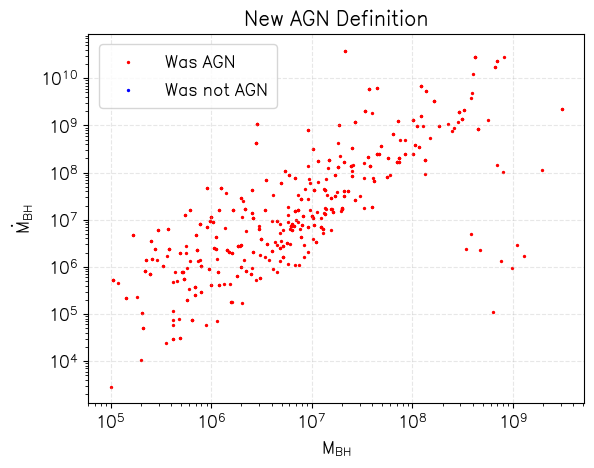

In [27]:
plt.scatter(was_agn.Mbh.values, was_agn.Mdot.values, s=2, color='r', label='Was AGN')
plt.scatter(wasnt_agn.Mbh.values, wasnt_agn.Mdot.values, s=2, color='b', label='Was not AGN')
plt.title("New AGN Definition", fontsize=18)
plt.xlabel(r'$M_{BH}$', fontsize=15)
plt.ylabel(r'$\dot{M}_{BH}$', fontsize=15)
plt.xscale('log')
plt.yscale('log')
#plt.ylim([1e11, 1e13])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(loc='upper left', fontsize=15)
plt.show()

In [2]:
from astropy import units as u

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


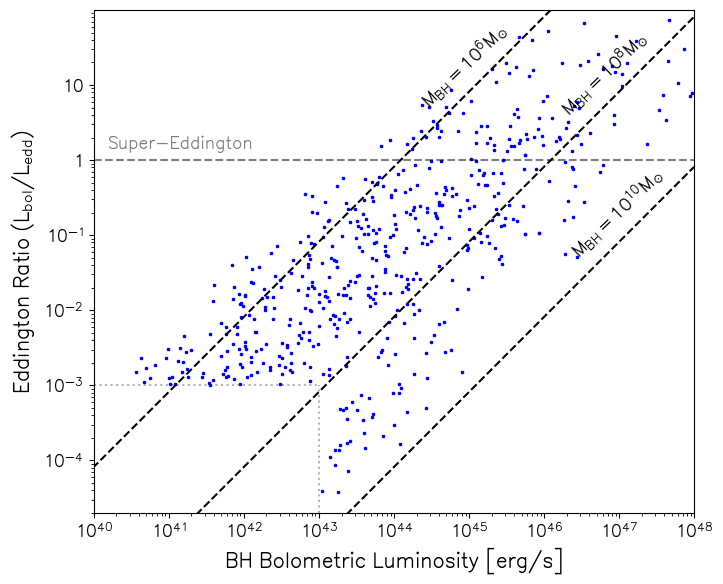

In [53]:
Lbol = np.logspace(38,48,100)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.axhline(1, color='k', linestyle='--', alpha=0.5)
ax.scatter(was_agn.Lbol.values, was_agn.Lbol.values/was_agn.Ledd.values, s=3, color='b', marker='x')
ax.scatter(wasnt_agn.Lbol.values, wasnt_agn.Lbol.values/wasnt_agn.Ledd.values, s=2, color='magenta', marker='x')
ax.scatter(isnt_agn.Lbol.values, isnt_agn.Lbol.values/isnt_agn.Ledd.values, s=3, color='b', marker='x')

ax.text(1.5e40,1.4, 'Super-Eddington', alpha=0.5, fontsize=15)
ax.text(2e44, 5, r'$M_{BH}=10^6 M_{\odot}$', rotation=44, color='k', fontsize=16)
ax.text(1.5e46, 4, r'$M_{BH}=10^8 M_{\odot}$', rotation=44, color='k', fontsize=16)
ax.text(2e46, 5e-2, r'$M_{BH}=10^{10} M_{\odot}$', rotation=44, color='k', fontsize=16)
ax.axhline(1e-3, color='k', alpha=0.3, linestyle='dotted', xmin=0, xmax=3/8)
ax.axvline(1e43, color='k', alpha=0.3, linestyle='dotted', ymin=0, ymax=(-3-np.log10(2e-5))/(2-np.log10(2e-5)))
for i,Mbh in enumerate([1e6,1e8,1e10]):
    Ledd = (3.2e4 * Mbh * u.L_sun).to(u.erg/u.s)
    ax.plot(Lbol, Lbol/Ledd, color='k', linestyle='--')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e40,1e48])
ax.set_ylim([2e-5,100])
ax.set_xticks([1e40,1e41,1e42,1e43,1e44,1e45,1e46,1e47,1e48])
ax.set_xticklabels([r'$10^{40}$', r'$10^{41}$', r'$10^{42}$', r'$10^{43}$', r'$10^{44}$', r'$10^{45}$', r'$10^{46}$', r'$10^{47}$', r'$10^{48}$'], fontsize=15)
#ax.set_xticklabels([r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', '1', '10'], fontsize=15)
ax.set_yticks([1e-4,1e-3,1e-2,1e-1,1,10])
ax.set_yticklabels([r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', '1', '10'], fontsize=15)
ax.set_aspect("equal","box")
ax.legend(loc='lower right',frameon=False, fontsize=18)
ax.set_xlabel("BH Bolometric Luminosity [erg/s]", fontsize=18)
ax.set_ylabel(r"Eddington Ratio ($L_{bol}/L_{edd}$)", fontsize=18)
plt.tight_layout()
plt.savefig("./poster_figs/Eddington.pdf")
plt.show()

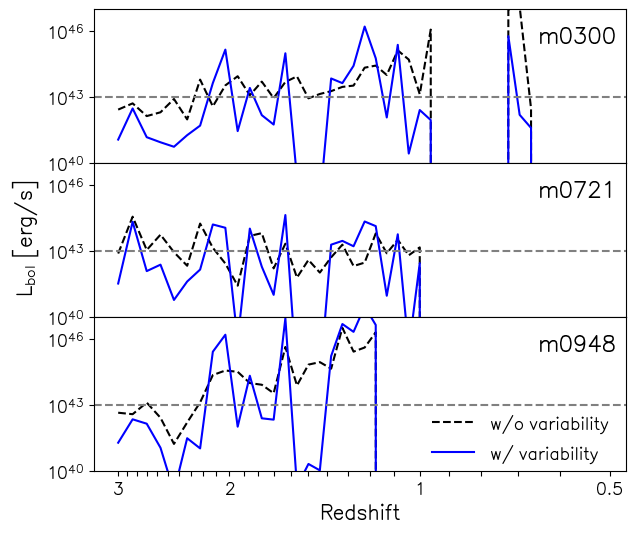

In [48]:
fig,axes = plt.subplots(nrows=3, ncols=1,figsize=(7,6), sharex=True)
for i,hid in enumerate(['m0300','m0721','m0948']):
    lums = []
    for snap in range(19,61):
        lums.append(get_BH_Lbol(hid,snap))
    
    axes.flat[i].loglog(halos[hid].mmps.redshift.values, lums, color='k', linestyle='--', label='w/o variability')
    axes.flat[i].loglog(halos[hid].mmps.redshift.values, vary_bhluminosity(lums, random_state=0), color='b', linestyle='-', label='w/ variability')
    axes.flat[i].set_xticks(np.linspace(3,0.5,26))
    axes.flat[i].set_xticklabels(['3','','','','','','','','','','2','','','','','','','','','','1','','','','','0.5'], fontsize=15)
    #axes.flat[i].set_xticks([0.5,0.6,1,2,3])#[3,2,1,0.6,0.5])
    #axes.flat[i].set_xticklabels(['0.5','','1','2','3'])#['3','2','1','','0.5'])
    axes.flat[i].invert_xaxis()
    axes.flat[i].set_ylim([1e40,1e47])
    axes.flat[i].set_yticks([1e40,1e43,1e46])
    axes.flat[i].set_yticklabels([r'$10^{40}$',r'$10^{43}$',r'$10^{46}$'], fontsize=15)
    axes.flat[i].text(0.65, 3e45, hid, color='k', fontsize=20)#(loc='upper right')
    axes.flat[i].axhline(1e43, color='gray', linestyle='--')
    axes.flat[i].set_xlabel('Redshift', fontsize=18)
    if i==2:
        axes.flat[i].legend(fontsize=15, frameon=False, bbox_to_anchor=(0.6,0.49))
    #axes.flat[i].set_ylabel(r'$L_{bol}$ [erg/s]', fontsize=18)
fig.supylabel(r'$L_{bol}$ [erg/s]', fontsize=18)
plt.subplots_adjust(hspace=0,left=0.14)
plt.savefig("./poster_figs/Lbol_rep3.pdf")
plt.show()

In [2]:
100*5, 2*900

(500, 1800)

In [4]:
def F(G, M20):
    piecewise = 0.14*M20 + 0.778
    absF = abs(-0.693*M20 + 4.95*G - 3.85)
    ix = np.where(G < piecewise)
    absF[ix] = -absF[ix]
    return absF

def S(G, M20):
    piecewise = -0.14*M20 + 0.33
    absS = abs(0.139*M20 + 0.99*G - 0.327)
    ix = np.where(G < piecewise)
    absS[ix] = -absS[ix]
    return absS

df_final['FGM20'] = F(df_final.G.values, df_final.M20.values)
df_final['SGM20'] = S(df_final.G.values, df_final.M20.values)

df_final.to_pickle("../data_products/final_ML_inputs.pkl")

In [2]:
data = pd.read_pickle("../../AGN-Mergers-master/data_products/data_SB25.pkl")
data.head()

ASYM      CONC         D  FLAG  FLAG_SERSIC      GINI         I  Lbol  \
0  0.063736  3.324403  0.120143   0.0          0.0  0.591763  0.000000  -inf   
1  0.052556  3.248586  0.120077   0.0          0.0  0.582469  0.000000  -inf   
2  0.057080  3.036141  0.113157   0.0          0.0  0.570403  0.000000  -inf   
3  0.103737  2.498855  0.155996   0.0          0.0  0.499603  0.000000  -inf   
4  0.428767  1.492379  0.576927   0.0          0.0  0.527578  0.686463  -inf   

          M       M20  ...  control_close_pairs_def3  \
0  0.000000 -1.690444  ...                       0.0   
1  0.000000 -1.738627  ...                       0.0   
2  0.000000 -1.804020  ...                       0.0   
3  0.000000 -1.603434  ...                       0.0   
4  0.909091 -0.858537  ...                       0.0   

   control_close_pairs_def3_1  control_close_pairs_def4  \
0                         NaN                       0.0   
1                         NaN                       0.0   
2                         NaN                       0.0   
3                         NaN                       0.0   
4                         NaN                       0.0   

  control_close_pairs_def4_1  last_merger_obs  merger_def_obs  \
0                        NaN         0.000000            True   
1                        NaN         0.000000            True   
2                        NaN         0.161732           False   
3                        NaN        -4.269056           False   
4                        NaN         0.000000            True   

  control_last_merger_obs_1 control_last_merger_obs_2  \
0                  224552.0                  163570.0   
1                  175562.0                  175571.0   
2                  175551.0                  175551.0   
3                       0.0                       0.0   
4                  224481.0                  224491.0   

  control_merger_def_obs_1  control_merger_def_obs_2  
0                 224550.0                  224561.0  
1                 224572.0                  224572.0  
2                      0.0                       0.0  
3                      0.0                       0.0  
4                 227482.0                  224491.0  

[5 rows x 68 columns]

In [10]:
halo_num = data.halo_num.values
snapNum = data.timestep.values
def2 = data.close_pairs_def2.values
data2 = pd.DataFrame(columns=['halo_num','snapNum','def2','FGM20','SGM20'], data=np.c_[halo_num, snapNum, def2, data.FGM20.values, data.SGM20.values])
data2.head()

halo_num  snapNum  def2     FGM20     SGM20
0     224.0     56.0   0.0  0.250702  0.023873
1     224.0     56.0   0.0  0.238092  0.007975
2     224.0     56.0   0.0  0.223681 -0.013060
3     224.0     48.0   0.0 -0.265783 -0.055270
4     224.0     48.0   0.0 -0.643522  0.075966

In [14]:
print(len(data2[(data2.SGM20<0) & (data2.FGM20<0)])/len(data2))
print(len(data2[(data2.SGM20<0) & (data2.FGM20>0)])/len(data2))

0.5323538605814317
0.2156924038762113


In [19]:
pair = []
for i in range(len(data2)):
    if data2.def2.iat[i]==1:
        p = (data2.halo_num.iat[i], data2.snapNum.iat[i])
        if p not in pair:
            pair.append(p)

In [25]:
pair_tot = []
for i in range(len(data2)):
    p = (data2.halo_num.iat[i], data2.snapNum.iat[i])
    if p not in pair:
        pair_tot.append(p)

In [ ]:
print((data.close_pairs_def1==1).sum() / len(data))
print((data.close_pairs_def2==1).sum() / len(data))
print((data.close_pairs_def3==1).sum() / len(data))
print((data.close_pairs_def4==1).sum() / len(data))

0.1800562675836199
0.20912785245389184
0.06627070959674898
0.08315098468271334


# Black Hole Luminosities and Intrinsic Merger

In [8]:
def calc_beta_err(c, k, n):
    """Calculate beta errors for binomially distributed fractions of k/n, according to Cameron+(2011).

    Args:
        c (float): Confidence level. Defaults to 1-sigma = 0.683
        k (int): Number of successes
        n (int): Number of trials

    Returns:
        float: 1-sigma error for a given fraction of successes to trials
    """
    from scipy.stats import beta

    if n == 0:
        return np.asarray([np.nan, np.nan]).reshape(2, 1)
    a = k + 1
    b = n - k + 1
    p_lower = beta.ppf((1 - c) / 2.0, a, b)
    p_upper = beta.ppf(1 - (1 - c) / 2.0, a, b)
    if k / n - p_lower < 0:
        p_lower = 0
    return abs(np.array([p_lower, p_upper]).reshape(2, 1) - k / n)

In [9]:
AGNs = df_final[df_final.AGN==1]
noAGNs = df_final[df_final.AGN==0]

merger = df_final[df_final.def_4>0]
non_merger = df_final[df_final.def_4==0]

/tmp/ipykernel_3278661/802892029.py:13: RuntimeWarning: invalid value encountered in long_scalars
  AGNfrac = (selected_2.Lbol>1e43).sum()/len(selected_2)
/usr/local/miniconda3/envs/powderday/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/local/miniconda3/envs/powderday/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


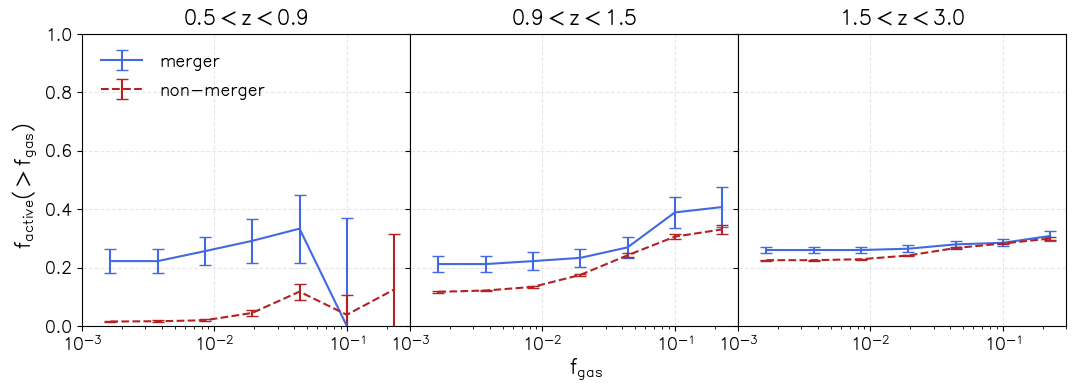

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharey=True)
zbins = np.array([0.5,0.9,1.5,3])
fgasbins = np.logspace(-3,-0.5,8)
for i in range(3):
    zstart = zbins[i]
    zend = zbins[i+1]

    selected = merger[(merger.redshift>zstart) & (merger.redshift<zend)]
    agnfracs = []
    errors = []
    for j in range(len(fgasbins)-1):
        selected_2 = selected[(selected.GM.values/(selected.GM.values+selected.SM.values) > fgasbins[j])]
        AGNfrac = (selected_2.Lbol>1e43).sum()/len(selected_2)
        agnfracs.append(AGNfrac)
        errors.append(calc_beta_err(0.684, AGNfrac, len(selected_2))[1][0])
    #error = calc_beta_err(0.95, num_fgas_agn, num_fgas)
    #ax[i].plot((fgasbins[1:]+fgasbins[:-1])/2, agnfracs, marker='.', color='royalblue', label='merger')
    ax[i].errorbar((fgasbins[1:]+fgasbins[:-1])/2, agnfracs, yerr=errors, capsize=4, color='royalblue', label='merger')
    
    selected = non_merger[(non_merger.redshift>zstart) & (non_merger.redshift<zend)]
    agnfracs = []
    errors = []
    for j in range(len(fgasbins)-1):
        selected_2 = selected[(selected.GM.values/(selected.GM.values+selected.SM.values) > fgasbins[j])]
        #print(len(selected_2))
        AGNfrac = (selected_2.Lbol>1e43).sum()/len(selected_2)
        agnfracs.append(AGNfrac)
        errors.append(calc_beta_err(0.684, AGNfrac, len(selected_2))[1][0])
    
    #ax[i].plot((fgasbins[1:]+fgasbins[:-1])/2, agnfracs, marker='.',linestyle='--', color='firebrick', label='non-merger')
    ax[i].errorbar((fgasbins[1:]+fgasbins[:-1])/2, agnfracs, yerr=errors, capsize=4, linestyle='--', color='firebrick', label='non-merger')
    if i==0:
        ax[i].legend(loc='upper left', frameon=False, fontsize=15)
    ax[i].set_xscale('log')
    ax[i].set_xlim([1e-3,3e-1])
    ax[i].set_xticks([1e-3,1e-2,1e-1])
    ax[i].set_xticklabels([r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$'], fontsize=15)
    ax[i].set_yticks([0,0.2,0.4,0.6,0.8,1])
    ax[i].set_yticklabels(['0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=15)

    ax[i].set_title(f'{zstart}$<$z$<${zend}', fontsize=18)
    ax[i].set_ylim([0,1])
    ax[i].grid(True, alpha=0.3, linestyle='--')
#ax.legend()
fig.supxlabel(r'$f_{gas}$', fontsize=18)
fig.supylabel(r'$f_{active}$($>f_{gas}$)', fontsize=18)
#plt.legend()
plt.subplots_adjust(left=.08, bottom=.15, wspace=0)
plt.savefig("./poster_figs/fgas_factive.pdf")
plt.show()

22 998
113 777
346 676


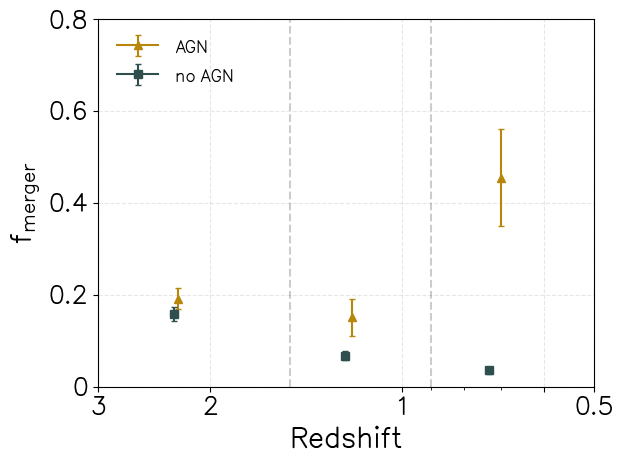

In [8]:
fig,ax = plt.subplots()
zbins2 = [0.5,0.9,1.5,3.0]#np.logspace(np.log10(0.5),np.log10(3),4)
for i in range(len(zbins2)-1):
    zstart = zbins2[i]
    zend = zbins2[i+1]
    agn_selec = AGNs[(AGNs.redshift>zstart) & (AGNs.redshift<zend)]
    noagn_selec = noAGNs[(noAGNs.redshift>zstart) & (noAGNs.redshift<zend)]
    print(len(agn_selec), len(noagn_selec))
    ax.errorbar([(zstart+zend)/2], (agn_selec.def_4>0).sum()/len(agn_selec), yerr=calc_beta_err(0.684, (agn_selec.def_4>0).sum(), len(agn_selec))[1][0] ,
                 marker='^', color='darkgoldenrod', label='AGN', capsize=2)
    ax.errorbar([(zstart+zend)/2+0.03], (noagn_selec.def_4>0).sum()/len(noagn_selec), yerr=calc_beta_err(0.684, (noagn_selec.def_4>0).sum(), len(noagn_selec))[1][0],
                 marker='s', color='darkslategrey', label='no AGN', capsize=2)
    if i==0:
        plt.legend(loc='upper left', fontsize=15, frameon=False)
ax.set_xlabel('Redshift', fontsize=25)
ax.set_ylabel(r'$f_{merger}$', fontsize=25)
ax.set_xscale('log')
ax.set_xticks([3,2,1,0.6,0.5])
ax.set_xticklabels([3,2,1,'',0.5], fontsize=22)
ax.set_ylim([0,0.8])
ax.set_yticks([0,0.2,0.4,0.6,0.8])
ax.set_yticklabels([0,0.2,0.4,0.6,0.8], fontsize=22)
ax.axvline(0.9, linestyle='--', alpha=0.2, color='k')
ax.axvline(1.5, linestyle='--', alpha=0.2, color='k')
ax.invert_xaxis()
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("poster_figs/z_fmerger.pdf")
plt.show()

# Random Forest

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.metrics import geometric_mean_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import auc

def calc_roc(y_true, y_fit_prob):
    from sklearn.metrics import confusion_matrix
    thresholds = np.linspace(0, 1, 100)
    tpr, fpr = [], []
    for thresh in thresholds:
        tn, fp, fn, tp = confusion_matrix(y_true, y_fit_prob >= thresh).ravel()
        tpr.append(tp / (tp + fn))
        fpr.append(fp / (fp + tn))
    return np.asarray(fpr), np.asarray(tpr), thresholds
    
def balance_point(y_true, y_fit_prob):
    fpr, tpr, thresholds = calc_roc(y_true, y_fit_prob)
    bp = abs(tpr - (1 - fpr)).argmin()
    return thresholds[bp]

def f1_score(y_true, y_fit_prob):
    from sklearn.metrics import f1_score as f1
    thresholds = np.linspace(0, 1, 100)
    f1_scores = [f1(y_true, (y_fit_prob >= thresh)) for thresh in thresholds]
    return thresholds[np.argmax(f1_scores)]

def prec_score(y_true, y_fit_prob):
    from sklearn.metrics import precision_score
    thresholds = np.linspace(0, 1, 100)
    prec_scores = [precision_score(y_true, (y_fit_prob >= thresh)) for thresh in thresholds]
    return thresholds[np.argmax(prec_scores)]

In [3]:
from sklearn.metrics import accuracy_score

0 [0.16791779 0.1236025  0.22626028 0.16221064 0.32000879]
1 [0.16457917 0.1273911  0.19841098 0.17629136 0.33332739]
2 [0.1648688  0.12372188 0.22076343 0.16331404 0.32733185]
3 [0.1493978  0.13151348 0.22517711 0.18881264 0.30509897]
4 [0.14610723 0.12374064 0.20480266 0.18795577 0.3373937 ]
5 [0.16922539 0.11898868 0.19974566 0.16935034 0.34268993]
6 [0.16537653 0.1173383  0.20432125 0.17649547 0.33646845]
7 [0.1594542  0.11584088 0.21149612 0.17585589 0.33735291]
8 [0.16407844 0.12412414 0.19677259 0.16316519 0.35185964]
9 [0.15608405 0.1179233  0.22981257 0.16364162 0.33253845]


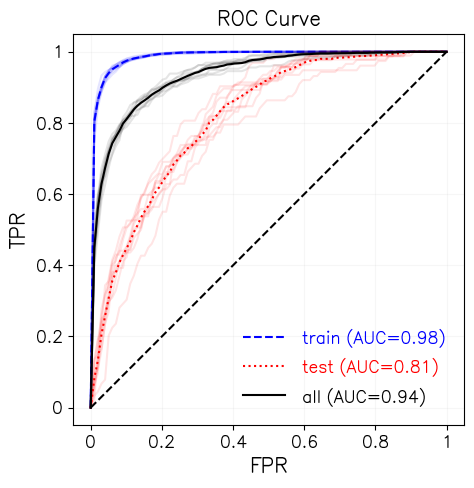

In [4]:
features = ['FGM20', 'SGM20', 'ASYM', 'CONC', 'redshift']

random_state = 42
X = df_final.loc[:,features]
y = df_final['def_4'].values
y[y>0] = 1

mean_fpr = np.linspace(0,1,100)
roc = {"train":[], "test":[], "all":[]}
f1 = {"train":[], "test":[], "all":[]}
gmean = {"train":[], "test":[], "all":[]}

thrs = []
y_probs = []
for trial in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    smote_sample = SMOTE(random_state=None)
    X_train_sm, y_train_sm = smote_sample.fit_resample(X_train,y_train)

    classifier = RandomForestClassifier(random_state=None, criterion='entropy', verbose=0)
    hyper_parameters = {
        'n_estimators': [100, 150, 200, 250],
        'max_depth': [6, 9, 12, 20, 30],
        'min_samples_split': [0.01, 0.05, 0.1],
    }
    clf = GridSearchCV(classifier, hyper_parameters, n_jobs=16, cv=10, scoring='f1', verbose=0)
    clf.fit(X=X_train_sm, y=y_train_sm)
    clf_best, d_score, d_opt = clf.best_estimator_, clf.best_score_, clf.best_params_
    print(trial, clf_best.feature_importances_)

    y_train_prob = clf_best.predict_proba(X_train_sm).T[1]
    y_train_pred = clf_best.predict(X_train_sm)
    y_test_prob  = clf_best.predict_proba(X_test).T[1]
    y_test_pred = clf_best.predict(X_test)
    y_all_prob   = clf_best.predict_proba(X).T[1]
    y_all_pred = clf_best.predict(X)

    fpr_train, tpr_train, _ = roc_curve(y_train_sm, y_train_prob)
    tpr_train = np.interp(mean_fpr, fpr_train, tpr_train); tpr_train[0] = 0
    #f1_train = f1_score(y_train_sm, y_train_prob)
    gmean_train = geometric_mean_score(y_train_sm, y_train_pred)
    fpr_test, tpr_test, _   = roc_curve(y_test,  y_test_prob)
    tpr_test = np.interp(mean_fpr, fpr_test, tpr_test); tpr_test[0] = 0
    #f1_test = f1_score(y_test, y_test_prob)
    gmean_test = geometric_mean_score(y_test, y_test_pred)
    fpr_all, tpr_all, thresholds  = roc_curve(y, y_all_prob)
    tpr_all = np.interp(mean_fpr, fpr_all, tpr_all); tpr_all[0] = 0
    #f1_all = f1_score(y, y_all_prob)
    gmean_all = geometric_mean_score(y, y_all_pred)

    #y_train_prob = clf_best.predict_proba(X_train_sm).T[1]
    f1_vals = np.asarray([f1_score(y_train_sm, y_train_prob>=prob) for prob in thresholds])
    threshold = thresholds[np.argmax(f1_vals)]

    y_probs.append(list(y_all_prob))
    thrs.append(threshold)

    roc['train'].append(tpr_train)
    roc['test'].append(tpr_test)
    roc['all'].append(tpr_all)
    #f1['train'].append(f1_train)
    #f1['test'].append(f1_test)
    #f1['all'].append(f1_all)
    gmean['train'].append(gmean_train)
    gmean['test'].append(gmean_test)
    gmean['all'].append(gmean_all)

fig,ax = plt.subplots()
colors = {'train':'b','test':'r','all':'k'}
linestyles = {'train':'--','test':'dotted','all':'solid'}
for col in roc.keys():
    for tpr in roc[col]:
        ax.plot(mean_fpr, tpr, color=colors[col], alpha=0.1)
    ax.plot(mean_fpr, np.array(roc[col]).mean(axis=0), color=colors[col], linestyle=linestyles[col],
             label=f'{col} (AUC={auc(mean_fpr,tpr):.2f})')
#ax.scatter([mean_fpr[thresh_pnts]])
ax.plot([0,1],[0,1], color='k', linestyle='--')
ax.grid(True, alpha=0.1)
ax.set_aspect("equal","box")
ax.legend(loc='best', frameon=False, fontsize=15, labelcolor='linecolor')
ax.set_xlabel('FPR', fontsize=18)
ax.set_ylabel('TPR', fontsize=18)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1])
ax.set_xticklabels([0,0.2,0.4,0.6,0.8,1], fontsize=15)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1], fontsize=15)
plt.tight_layout()
plt.title("ROC Curve", fontsize=18)
plt.savefig("poster_figs/ROC_curve.pdf")
plt.show()
    

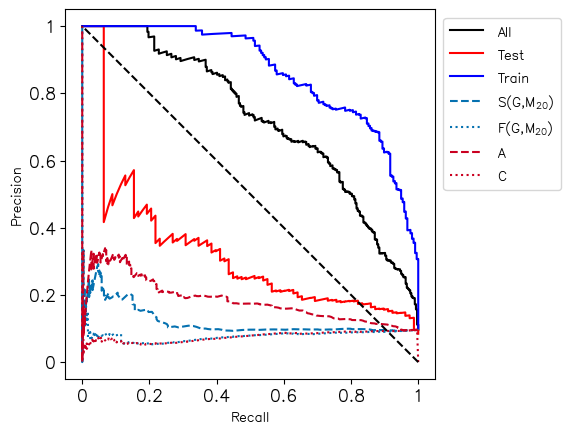

In [49]:
from sklearn.metrics import precision_recall_curve, f1_score

color = 'k r b'.split()
label = 'All Test Train'.split()
i = 0
fig,ax = plt.subplots()
for (xx,yy) in [(X,y), (X_test,y_test), (X_train,y_train)]:
    probs = clf_best.predict_proba(xx)
    prec,recall,thrs = precision_recall_curve(yy, probs.T[1])
    recall[0] = 1
    prec[-1] = 1
    ax.plot(recall, prec, color=color[i], label=label[i],)
    i += 1

### S(G, M_20)
colors = ['#0571b0', '#CA0020']

s_range = np.linspace(-1.0717313370975174,0.3093223194130034,1000)# np.linspace(-1, 0., 100)
precs,recalls = [], []
for s in s_range:
    y_pred = df_final.SGM20.values >= s
    y_true = df_final.def_4.values
    y_true[y_true>0] = 1
    (tn, fp), (fn, tp) = confusion_matrix(y_true, y_pred)
    prec = tp/(tp+fp)
    recall = tp/(tp+fn)
    precs.append(prec)
    recalls.append(recall)
recalls[0] = 1
precs[-1] = 1
ax.plot(recalls,precs, color=colors[0], linestyle='--', label=r'S(G,M$_{20})$')

### F(G,M_20)
f_range = np.linspace(-1.2477158403069657, 4.697802557742312,1000) #np.linspace(-3, 3, 100)
precs,recalls = [], []
for f in f_range:
    y_pred = df_final.FGM20.values >= f
    y_true = df_final.def_4.values
    y_true[y_true>0] = 1
    (tn, fp), (fn, tp) = confusion_matrix(y_true, y_pred)
    prec = tp/(tp+fp)
    recall = tp/(tp+fn)
    precs.append(prec)
    recalls.append(recall)
recalls[0] = 1
precs[-1] = 1
ax.plot(recalls,precs, color=colors[0], linestyle='dotted', label=r'F(G,M$_{20})$')

### Asymmetry
a_range = np.linspace(0, 1, 1000)
precs,recalls = [], []
for a in a_range:
    y_pred = df_final.ASYM.values >= a
    y_true = df_final.def_4.values
    y_true[y_true>0] = 1
    (tn, fp), (fn, tp) = confusion_matrix(y_true, y_pred)
    prec = tp/(tp+fp)
    recall = tp/(tp+fn)
    precs.append(prec)
    recalls.append(recall)
recalls[0] = 1
precs[-1] = 1
ax.plot(recalls,precs, color=colors[1], linestyle='--', label='A')

### Concentration
c_range = np.linspace(0.2335612327915764, 4.69950824437421, 1000)#np.linspace(0.2, 4.7, 100)
precs,recalls = [], []
for c in c_range:
    y_pred = df_final.CONC.values >= c
    y_true = df_final.def_4.values
    y_true[y_true>0] = 1
    (tn, fp), (fn, tp) = confusion_matrix(y_true, y_pred)
    prec = tp/(tp+fp)
    recall = tp/(tp+fn)
    precs.append(prec)
    recalls.append(recall)
recalls[0] = 1
precs[0] = 0
ax.plot(recalls,precs, color=colors[1], linestyle='dotted', label='C')


ax.set_xticks([0,0.2,0.4,0.6,0.8,1])
ax.set_xticklabels([0,0.2,0.4,0.6,0.8,1], fontsize=15)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1], fontsize=15)
ax.set_aspect("equal","box")
ax.legend(bbox_to_anchor=(1,1))
ax.plot([1,0],[0,1], color='k', linestyle='--')
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
plt.show()

In [14]:
y_probs_mean = np.array(y_probs).mean(axis=0)
y_probs_mean.shape

(3076,)

In [18]:
thresholds = np.linspace(0,1,100)

cnt = []
for thr in thresholds:
    cnt.append((y_probs_mean>thr).sum())

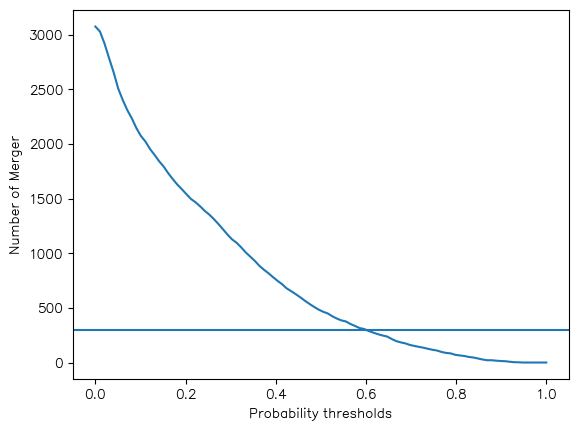

In [46]:
plt.plot(thresholds, cnt)
plt.axhline(len(merger))
plt.xlabel('Probability thresholds')
plt.ylabel('Number of Merger')
plt.show()

In [36]:
result2 = np.array(result)

In [45]:
result = y_probs_mean.copy()
result[result>=0.6] = 1
result[result<0.6] = 0
df_final['synthetic_merger_0.6'] = result

In [41]:
df_final['probability'] = y_probs_mean

In [42]:
df_final['synthetic_merger_0.4'] = (df_final.probability>0.4).astype(int)
df_final['synthetic_merger_0.5'] = (df_final.probability>0.5).astype(int)
df_final['synthetic_merger_0.6'] = (df_final.probability>0.6).astype(int)
df_final['synthetic_merger_0.61'] = (df_final.probability>0.61).astype(int)
df_final['synthetic_merger_0.7'] = (df_final.probability>0.7).astype(int)

In [45]:
TP = ((df_final['synthetic_merger_0.6']==1)&(df_final.def_4>0)).sum()
FP = ((df_final['synthetic_merger_0.6']==1)&(df_final.def_4==0)).sum()
TN = ((df_final['synthetic_merger_0.6']==0)&(df_final.def_4==0)).sum()
FN = ((df_final['synthetic_merger_0.6']==0)&(df_final.def_4>0)).sum()

In [46]:
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1 = 2*precision*recall/(precision+recall)
print(precision, recall, f1)

0.6710963455149501 0.6870748299319728 0.6789915966386555


In [42]:
df_final.to_pickle("../data_products/final_ML_inputs_KAS.pkl")

#### sharma style ROC

In [45]:
for col in ['SGM20','FGM20','ASYM','CONC']:
    print(df_final[col].values.min(), df_final[col].values.max())

-1.0717313370975174 0.3093223194130034
-1.2477158403069657 4.697802557742312
-99.0 1.209254753635073
0.2335612327915764 4.69950824437421


[Text(0, 0.0, '0.0'),
 Text(0, 0.2, '0.2'),
 Text(0, 0.4, '0.4'),
 Text(0, 0.6, '0.6'),
 Text(0, 0.8, '0.8'),
 Text(0, 1.0, '1.0')]

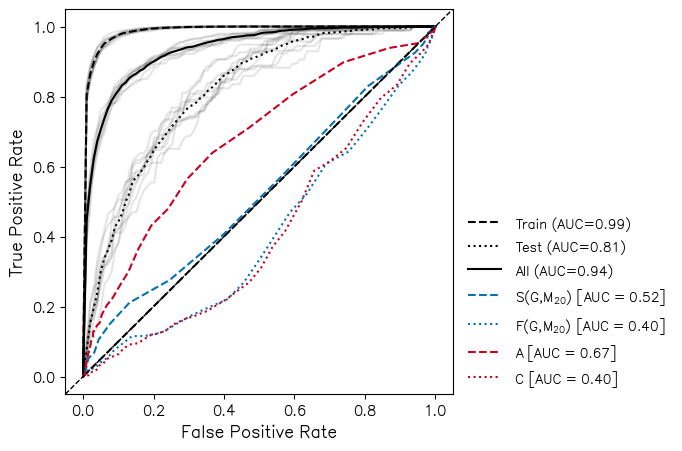

In [49]:
from sklearn.metrics import auc as roc_auc, roc_curve, roc_auc_score, f1_score, confusion_matrix, balanced_accuracy_score, matthews_corrcoef

fig, ax = plt.subplots(1, 1, figsize=(5,5))
colors = {'train':'b','test':'r','all':'k'}
for col in roc.keys():
    for tpr in roc[col]:
        ax.plot(mean_fpr, tpr, color='k', alpha=0.1)
    if col=='train': col2 = 'Train'
    elif col=='test': col2 = 'Test'
    else: col2 = 'All'
    ax.plot(mean_fpr, np.array(roc[col]).mean(axis=0), color='k', linestyle=linestyles[col],
             label=f'{col2} (AUC={roc_auc(mean_fpr,tpr):.2f})')
#ax.scatter([mean_fpr[thresh_pnts]])
ax.plot([0,1],[0,1], color='k', linestyle='--')

colors = ['#0571b0', '#CA0020']

### S(G, M_20)
s_range = np.linspace(-1.0717313370975174,0.3093223194130034,100)# np.linspace(-1, 0., 100)
fpr, tpr = [], []
for s in s_range:
    y_pred = df_final.SGM20.values >= s
    y_true = df_final.def_4.values
    y_true[y_true>0] = 1
    (tn, fp), (fn, tp) = confusion_matrix(y_true, y_pred)
    tpr.append(tp / (tp + fn))
    fpr.append(fp / (fp + tn))
ax.plot(fpr, tpr, color=colors[0], linestyle='--', label=r'S(G,M$_{20})$'+' [AUC = {:.2f}]'.format(roc_auc(fpr,tpr)))

### F(G,M_20)
f_range = np.linspace(-1.2477158403069657, 4.697802557742312,100) #np.linspace(-3, 3, 100)
fpr, tpr = [], []
for f in f_range:
    y_pred = df_final.FGM20.values >= f
    y_true = df_final.def_4.values
    y_true[y_true>0] = 1
    (tn, fp), (fn, tp) = confusion_matrix(y_true, y_pred)
    tpr.append(tp / (tp + fn))
    fpr.append(fp / (fp + tn))
ax.plot(fpr, tpr, color=colors[0], linestyle='dotted', label=r'F(G,M$_{20})$'+' [AUC = {:.2f}]'.format(roc_auc(fpr,tpr)))

### Asymmetry
a_range = np.linspace(0, 1, 100)
fpr, tpr = [], []
for a in a_range:
    y_pred = df_final.ASYM.values >= a
    y_true = df_final.def_4.values
    y_true[y_true>0] = 1
    (tn, fp), (fn, tp) = confusion_matrix(y_true, y_pred)
    tpr.append(tp / (tp + fn))
    fpr.append(fp / (fp + tn))
ax.plot(fpr, tpr, color=colors[1], linestyle='--', label='A [AUC = {:.2f}]'.format(roc_auc(fpr,tpr)))

### Concentration
c_range = np.linspace(0.2335612327915764, 4.69950824437421, 100)#np.linspace(0.2, 4.7, 100)
fpr, tpr = [], []
for c in c_range:
    y_pred = df_final.CONC.values >= c
    y_true = df_final.def_4.values
    y_true[y_true>0] = 1
    (tn, fp), (fn, tp) = confusion_matrix(y_true, y_pred)
    tpr.append(tp / (tp + fn))
    fpr.append(fp / (fp + tn))
ax.plot(fpr, tpr, color=colors[1], linestyle='dotted', label='C [AUC = {:.2f}]'.format(roc_auc(fpr,tpr)))

ax.plot([-0.08,1.12], [-0.08,1.12], 'k--', lw=1)
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])
ax.legend(bbox_to_anchor=(1,0.5), frameon=False, fontsize='medium')
ax.set_ylabel('True Positive Rate', fontsize=15)
ax.set_xlabel('False Positive Rate', fontsize=15)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_xticklabels(['0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=13)
ax.set_yticklabels(['0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=13)
#fig.savefig('../figures/merger-stats/roc_curve_sharma.pdf', bbox_inches='tight')

## Analyzing Synthetic Merger

In [6]:
AGNs = df_final[df_final.AGN==1]
noAGNs = df_final[df_final.AGN==0]

merger = df_final[df_final["probability"]>=0.6]
non_merger = df_final[df_final["probability"]<0.6]

/tmp/ipykernel_3311502/744446826.py:13: RuntimeWarning: invalid value encountered in long_scalars
  AGNfrac = (selected_2.Lbol>1e43).sum()/len(selected_2)
/tmp/ipykernel_3311502/744446826.py:25: RuntimeWarning: invalid value encountered in long_scalars
  AGNfrac = (selected_2.Lbol>1e43).sum()/len(selected_2)
/usr/local/miniconda3/envs/powderday/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/local/miniconda3/envs/powderday/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


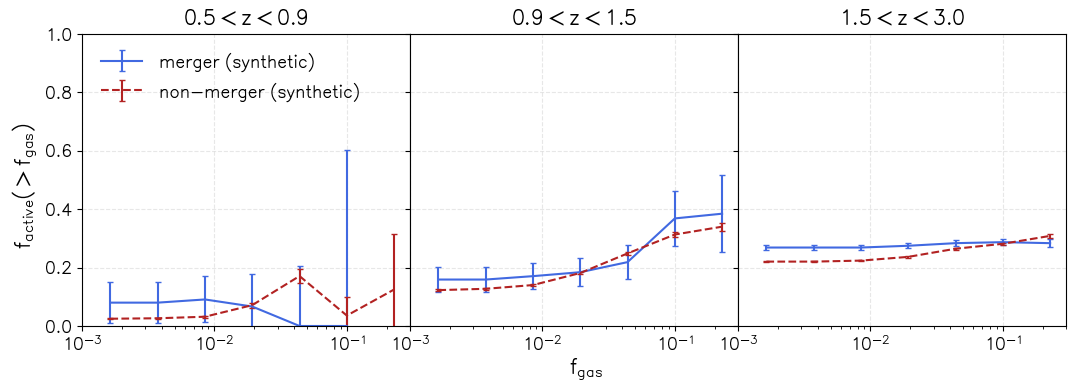

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharey=True)
zbins = np.array([0.5,0.9,1.5,3])
fgasbins = np.logspace(-3,-0.5,8)
for i in range(3):
    zstart = zbins[i]
    zend = zbins[i+1]

    selected = merger[(merger.redshift>zstart) & (merger.redshift<zend)]
    agnfracs = []
    errors = []
    for j in range(len(fgasbins)-1):
        selected_2 = selected[(selected.GM.values/(selected.GM.values+selected.SM.values) > fgasbins[j])]
        AGNfrac = (selected_2.Lbol>1e43).sum()/len(selected_2)
        agnfracs.append(AGNfrac)
        errors.append(calc_beta_err(0.684, AGNfrac, len(selected_2))[1][0])
    #error = calc_beta_err(0.95, num_fgas_agn, num_fgas)
    #ax[i].plot((fgasbins[1:]+fgasbins[:-1])/2, agnfracs, marker='.', color='royalblue', label='merger')
    #ax[i].errorbar((fgasbins[1:]+fgasbins[:-1])/2, agnfracs, yerr=errors, capsize=4, color='royalblue', label='merger (intrinsic)')

    selected = merger_synthetic[(merger_synthetic.redshift>zstart) & (merger_synthetic.redshift<zend)]
    agnfracs = []
    errors = []
    for j in range(len(fgasbins)-1):
        selected_2 = selected[(selected.GM.values/(selected.GM.values+selected.SM.values) > fgasbins[j])]
        AGNfrac = (selected_2.Lbol>1e43).sum()/len(selected_2)
        agnfracs.append(AGNfrac)
        errors.append(calc_beta_err(0.684, AGNfrac, len(selected_2))[1][0])
    #error = calc_beta_err(0.95, num_fgas_agn, num_fgas)
    #ax[i].plot((fgasbins[1:]+fgasbins[:-1])/2, agnfracs, marker='.', color='royalblue', label='merger')
    #ax[i].errorbar((fgasbins[1:]+fgasbins[:-1])/2, agnfracs, yerr=errors, capsize=2, linestyle='-', color='darkcyan', label='merger (synthetic)', marker='x')
    ax[i].errorbar((fgasbins[1:]+fgasbins[:-1])/2, agnfracs, yerr=errors, capsize=2, linestyle='-', color='royalblue', label='merger (synthetic)')#, marker='x')

    

###
    selected = non_merger[(non_merger.redshift>zstart) & (non_merger.redshift<zend)]
    agnfracs = []
    errors = []
    for j in range(len(fgasbins)-1):
        selected_2 = selected[(selected.GM.values/(selected.GM.values+selected.SM.values) > fgasbins[j])]
        AGNfrac = (selected_2.Lbol>1e43).sum()/len(selected_2)
        agnfracs.append(AGNfrac)
        errors.append(calc_beta_err(0.684, AGNfrac, len(selected_2))[1][0])
    #ax[i].errorbar((fgasbins[1:]+fgasbins[:-1])/2, agnfracs, yerr=errors, capsize=4, color='firebrick', label='non-merger (intrinsic)')

    selected = non_merger_synthetic[(non_merger_synthetic.redshift>zstart) & (non_merger_synthetic.redshift<zend)]
    agnfracs = []
    errors = []
    for j in range(len(fgasbins)-1):
        selected_2 = selected[(selected.GM.values/(selected.GM.values+selected.SM.values) > fgasbins[j])]
        #print(len(selected_2))
        AGNfrac = (selected_2.Lbol>1e43).sum()/len(selected_2)
        agnfracs.append(AGNfrac)
        errors.append(calc_beta_err(0.684, AGNfrac, len(selected_2))[1][0])
    
    #ax[i].plot((fgasbins[1:]+fgasbins[:-1])/2, agnfracs, marker='.',linestyle='--', color='firebrick', label='non-merger')
    #ax[i].errorbar((fgasbins[1:]+fgasbins[:-1])/2, agnfracs, yerr=errors, capsize=2, linestyle='-', color='orangered', label='non-merger (synthetic)', marker='x')
    ax[i].errorbar((fgasbins[1:]+fgasbins[:-1])/2, agnfracs, yerr=errors, capsize=2, linestyle='--', color='firebrick', label='non-merger (synthetic)')#, marker='x')
    

    if i==0:
        ax[i].legend(loc='upper left', frameon=False, fontsize=15)
    ax[i].set_xscale('log')
    ax[i].set_xlim([1e-3,3e-1])
    ax[i].set_xticks([1e-3,1e-2,1e-1])
    ax[i].set_xticklabels([r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$'], fontsize=15)
    ax[i].set_yticks([0,0.2,0.4,0.6,0.8,1])
    ax[i].set_yticklabels(['0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=15)

    ax[i].set_title(f'{zstart}$<$z$<${zend}', fontsize=18)
    ax[i].set_ylim([0,1])
    ax[i].grid(True, alpha=0.3, linestyle='--')
#ax.legend()
fig.supxlabel(r'$f_{gas}$', fontsize=18)
fig.supylabel(r'$f_{active}$($>f_{gas}$)', fontsize=18)
#plt.legend()
plt.subplots_adjust(left=.08, bottom=.15, wspace=0)
plt.savefig("./poster_figs/fgas_factive_synthetic.pdf")
plt.show()

In [39]:
((df_final.synthetic_merger==1)&(df_final.def_4>0)).sum() / (df_final.def_4>0).sum()

0.8775510204081632

22 998
113 777
346 676


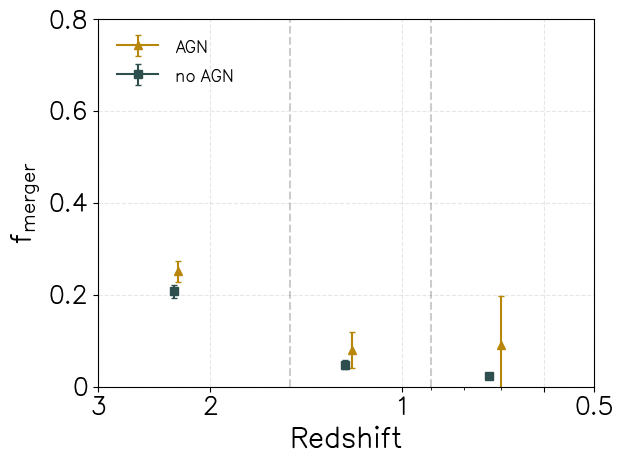

In [34]:
fig,ax = plt.subplots()
zbins2 = [0.5,0.9,1.5,3.0]#np.logspace(np.log10(0.5),np.log10(3),4)
for i in range(len(zbins2)-1):
    zstart = zbins2[i]
    zend = zbins2[i+1]
    agn_selec = AGNs[(AGNs.redshift>zstart) & (AGNs.redshift<zend)]
    noagn_selec = noAGNs[(noAGNs.redshift>zstart) & (noAGNs.redshift<zend)]
    print(len(agn_selec), len(noagn_selec))
    ax.errorbar([(zstart+zend)/2], (agn_selec.synthetic_merger==1).sum()/len(agn_selec), yerr=calc_beta_err(0.684, (agn_selec.def_4>0).sum(), len(agn_selec))[1][0] ,
                 marker='^', color='darkgoldenrod', label='AGN', capsize=2)
    ax.errorbar([(zstart+zend)/2+0.03], (noagn_selec.synthetic_merger==1).sum()/len(noagn_selec), yerr=calc_beta_err(0.684, (noagn_selec.def_4>0).sum(), len(noagn_selec))[1][0],
                 marker='s', color='darkslategrey', label='no AGN', capsize=2)
    if i==0:
        plt.legend(loc='upper left', fontsize=15, frameon=False)
ax.set_xlabel('Redshift', fontsize=25)
ax.set_ylabel(r'$f_{merger}$', fontsize=25)
ax.set_xscale('log')
ax.set_xticks([3,2,1,0.6,0.5])
ax.set_xticklabels([3,2,1,'',0.5], fontsize=22)
ax.set_ylim([0,0.8])
ax.set_yticks([0,0.2,0.4,0.6,0.8])
ax.set_yticklabels([0,0.2,0.4,0.6,0.8], fontsize=22)
ax.axvline(0.9, linestyle='--', alpha=0.2, color='k')
ax.axvline(1.5, linestyle='--', alpha=0.2, color='k')
ax.invert_xaxis()
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("poster_figs/z_fmerger_synthetic.pdf")
plt.show()